# package_LAB

In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import sys
sys.path.append('../')  # Add parent directory to the Python path

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

import package_LAB

from importlib import reload
package_DBR = reload (package_DBR)
package_LAB = reload(package_LAB)

from package_LAB import *
from package_DBR import *


# PID_RT

#### EBD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


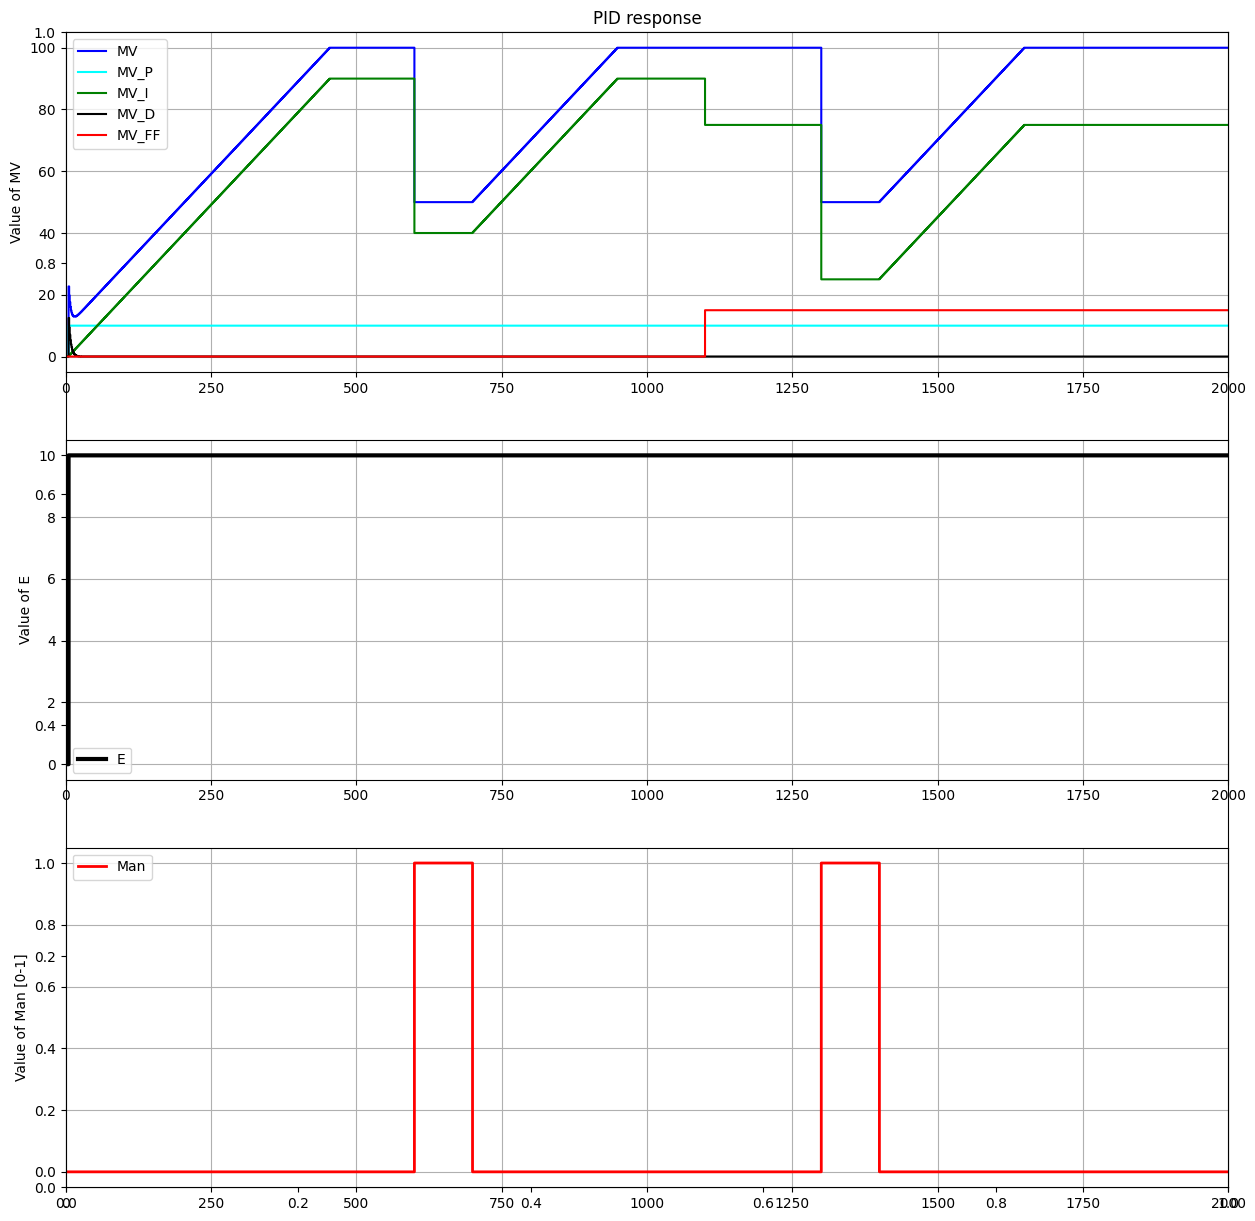

In [2]:


#-----init vectors------
t = []
tt= []
SP = []
MV = []
PV = []
DV =[]
Man = []
MVMan = []
MVFF = []
MVP = []
MVI = []
MVD = [] 
E  = []

#---------Variables------
TSim = 2000

Kc = 1
Ti = 50
Td = 5
alpha = 0.6
Ts = 1   

MVMin = 0 
MVMax = 100

N = int(TSim/Ts) + 1


#--------Paths----------
ManPath = {0: False, 600: True, 700:False, 1300:True, 1400:False, TSim : False}
MVManPath = {0:50, TSim:50}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}
MVFFPath = {0:0, 1100: 15}  



for i in range(0,N):
    t.append(i*Ts)
    tt.append(i*Ts)
    # tt.append(i*Ts)
    SelectPath_RT(SPPath, t,SP)
    SelectPath_RT(PVPath, t,PV)
    SelectPath_RT(ManPath, t,Man)
    SelectPath_RT(MVManPath, t,MVMan)
    SelectPath_RT(MVFFPath, t, MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E,False,0,"EBD")

plt.figure(figsize = (15,15))

#----------PID----------------
plt.title('PID response')
plt.subplot(3,1,1)
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.step(t,MV,'blue',label='MV',where='post')
plt.step(t,MVP,'cyan',label='MV_P',where='post')
plt.step(t,MVI,'green',label='MV_I',where='post')
plt.step(t,MVD,'black',label='MV_D',where='post')
plt.step(t, MVFF,'red',label='MV_FF',where='post')
# plt.step(t,MV,'orange', linestyle=':',label='MV_Trap',where='post')
plt.xlim([0, TSim])
plt.legend()
plt.grid()

#---------E-------------
plt.subplot(3,1,2)
plt.step(t,E ,'black',linewidth=3,label='E',where='post')
plt.ylabel('Value of E')
plt.legend(loc='best')
plt.xlim([0, TSim])
plt.grid()

#---------MAN--------------
plt.subplot(3,1,3)
plt.step(t,Man,'red',linewidth=2,label='Man',where='post')
plt.ylabel('Value of Man [0-1]')
plt.legend(loc='upper left')
plt.xlim([0, TSim])
plt.grid()


#### Trap

In [3]:
# #-----init vectors------
# t = []
# # tt= []
# SP = []
# MV = []
# PV = []
# DV =[]
# Man = []
# MVMan = []
# MVFF = []
# MVP = []
# MVI = []
# MVD = [] 
# E  = []

# SPTrap = []
# MVTrap = []
# PVTrap = []
# DVTrap = []
# MVPTrap = []
# MVITrap = []
# MVDTrap = []
# ETrap = []

# #---------Variables------
# TSim = 1275

# Kc = 1
# Ti = 50
# Td = 5
# alpha = 0.6
# Ts = 1   

# MVMin = 0 
# MVMax = 100

# N = int(TSim/Ts) + 1


# #--------Paths----------
# ManPath = {0: False, 600: True, 700:False, TSim : False}
# MVManPath = {0:50, TSim:50}
# SPPath = {0: 50, 5: 60, TSim : 60}
# PVPath = {0:50, 5:50, TSim:50}
# MVFFPath = {0:0, 1100: 10}  #scalaire pas binaire



# for i in range(0,N):
#     t.append(i*Ts)
#     # tt.append(i*Ts)
#     # tt.append(i*Ts)
#     SelectPath_RT(SPPath, t,SP)
#     SelectPath_RT(PVPath, t,PV)
#     SelectPath_RT(ManPath, t,Man)
#     SelectPath_RT(MVManPath, t,MVMan)
#     SelectPath_RT(MVFFPath, t, MVFF)
#     # PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E,False,0,"EBD")
#     PID_RT(SPTrap, PVTrap, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MVTrap, MVPTrap, MVITrap, MVDTrap, ETrap, False, 0,"TRAP")

# plt.figure(figsize = (15,15))

# #----------PID----------------
# plt.title('PID response')
# plt.subplot(3,1,1)
# plt.ylabel('Value of MV')
# plt.legend(loc='best')
# plt.step(t,MVTrap,'blue',label='MVTrap',where='post')
# plt.step(t,MVPTrap,'cyan',label='MV_P_Trap',where='post')
# plt.step(t,MVITrap,'green',label='MV_I_Trap',where='post')
# plt.step(t,MVDTrap,'black',label='MV_D_Trap',where='post')
# # plt.step(t, MVFF,'red',label='MV_FF',where='post')
# # plt.step(t,MV,'orange', linestyle=':',label='MV_Trap',where='post')
# plt.xlim([0, TSim])
# plt.legend()
# plt.grid()

# #---------E-------------
# plt.subplot(3,1,2)
# plt.step(t,ETrap ,'black',linewidth=3,label='E',where='post')
# plt.ylabel('Value of E')
# plt.legend(loc='best')
# plt.xlim([0, TSim])
# plt.grid()

# #---------MAN--------------
# plt.subplot(3,1,3)
# plt.step(t,Man,'red',linewidth=2,label='Man',where='post')
# plt.ylabel('Value of Man [0-1]')
# plt.legend(loc='upper left')
# plt.xlim([0, TSim])
# plt.grid()










# LL_RT()

In [4]:
help(LL_RT)

Help on function LL_RT in module package_LAB:

LL_RT(MV, Kp, TLead, TLag, Ts, PV, PVInit=0, method='EBD')
    The function "LL_RT" needs to be included in a "for or while loop".
    :param MV: input vector
    :param Kp: process gain
    :param T1: lead time constant (positive value) [s]
    :param T2: lag time constant (positive value) [s]
    :param Ts: sampling period [s]
    :param PV: output vector
    :param PVInit: (optional: default value is 0)
    :param method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    The function "LL_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that considers
    both lead and lag time constants.



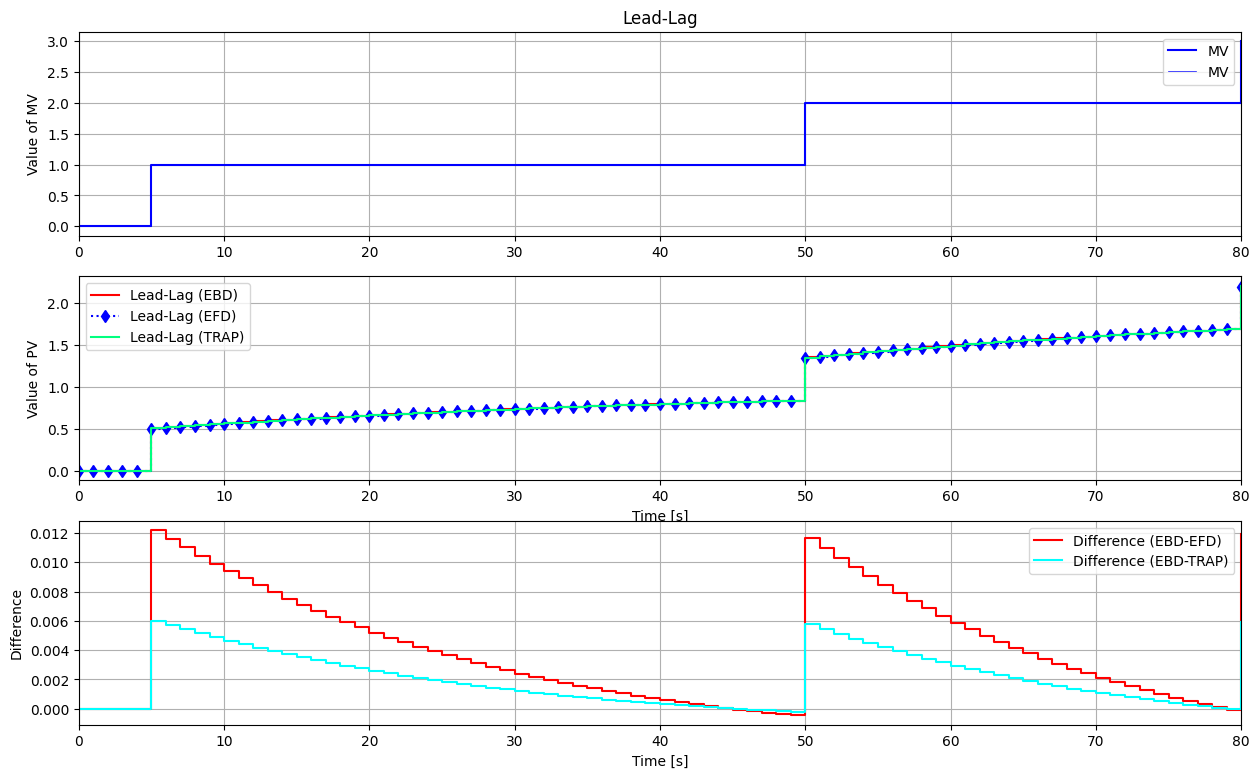

In [5]:
TSim = 80
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []
PV = []

# Parameters
Kp = 1
TLead = 20
TLag = 40
theta = 100


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    # Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MV, Kp, TLead, TLag, Ts, PV_EBD, 0, 'EBD')     # Euler Backwards Difference
    LL_RT(MV, Kp, TLead, TLag, Ts, PV_EFD, 0, 'EFD')     # Euler Forwards Difference
    LL_RT(MV, Kp, TLead, TLag, Ts, PV_TRAP, 0, 'TRAP')   # Trapezoidal Method
    
plt.figure(figsize = (15,9))

#---------MV-----------------
plt.subplot(3,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MV,'b-',linewidth=0.5,label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Lead-Lag')
plt.legend(loc='best')
plt.xlim([0, TSim])
plt.grid()


#---------LL------------------------
plt.subplot(3,1,2)
plt.step(t,PV_EBD,'-r',label='Lead-Lag (EBD)',where='post')
plt.step(t,PV_EFD,'d:b',label='Lead-Lag (EFD)',where='post')
plt.step(t,PV_TRAP,'springgreen',label='Lead-Lag (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   
plt.grid() 

#--------Differences_between_models----------------
plt.subplot(3, 1, 3)

# Calculate the difference element-wise (assuming lists have the same length)
diff_EBD_EFD = [a - b for a, b in zip(PV_EBD, PV_EFD)]
diff_EBD_TRAP = [a - b for a, b in zip(PV_EBD, PV_TRAP)]
diff_EFD_TRAP = [a - b for a, b in zip(PV_EFD, PV_TRAP)]
# print(diff_EBD_TRAP)

plt.step(t, diff_EBD_EFD, '-r', label='Difference (EBD-EFD)', where='post')
plt.step(t, diff_EBD_TRAP, 'cyan', label='Difference (EBD-TRAP)', where='post')
# plt.step(t, diff_EFD_TRAP, 'springgreen', label='Difference (EFD-TRAP)', where='post')
plt.ylabel('Difference')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])
plt.grid()






## IMCTuning

In [6]:
help(IMCTuning)

Help on function IMCTuning in module package_LAB:

IMCTuning(Kp, Tlag1, Tlag2, theta, gamma, model='SOPDT')
    Computes the optimised PID controller settings for FOPDT/SOPDT processes.
    :Kp: process gain
    :Tlag1: processfirst lag time constant.
    :Tlag2: (SOPDT only) process second lag time constant.
    :theta: process delay.
    :gamma: loop response time as a ratio of T1
    :model:
        FOPDT_PI: First Order Plus Dead Time for P-I control (IMC tuning case G)
        FOPDT_PID: First Order Plus Dead Time for P-I-D control (IMC tuning case H)
        SOPDT :Second Order Plus Dead Time for P-I-D control (IMC tuning case I)
        
    return : PID controller parameters Kc, Ti and Td



In [7]:
# Parameters for input-output dynamic
Kp = 0.36
T1p = 201 
T2p = 8
thetap = 8 

# Parameters PID controller
gamma = 0.6                                
Kc, Ti, Td = IMCTuning(Kp,T1p,T2p,thetap,gamma, 'SOPDT')

print("Kc = ",Kc)
print("Ti = ",Ti)
print("Td = ",Td)

Kc =  4.514428892344911
Ti =  209
Td =  7.69377990430622


# IMC Margins

In [8]:
help(Margin)

Help on function Margin in module package_LAB:

Margin(Ps, C, omega, Show=True)
    Calcule la marge de gain et la marge de phase. Elles nous permettent d'analyser la robustesse du PID.
    :Ps : Process
    :C: Fonction de transfert du Contrôleur 
    :omega : vecteur de la fréquence 
    :show : autorise l'affichage graphique



Gain margin : 17.086294805324023 dB at the ultimate frequency : 0.24001480078667736 rad/s
Phase margin :  106.09062832287653 ° at the crossover frequency : 0.013468304644516448 rad/s


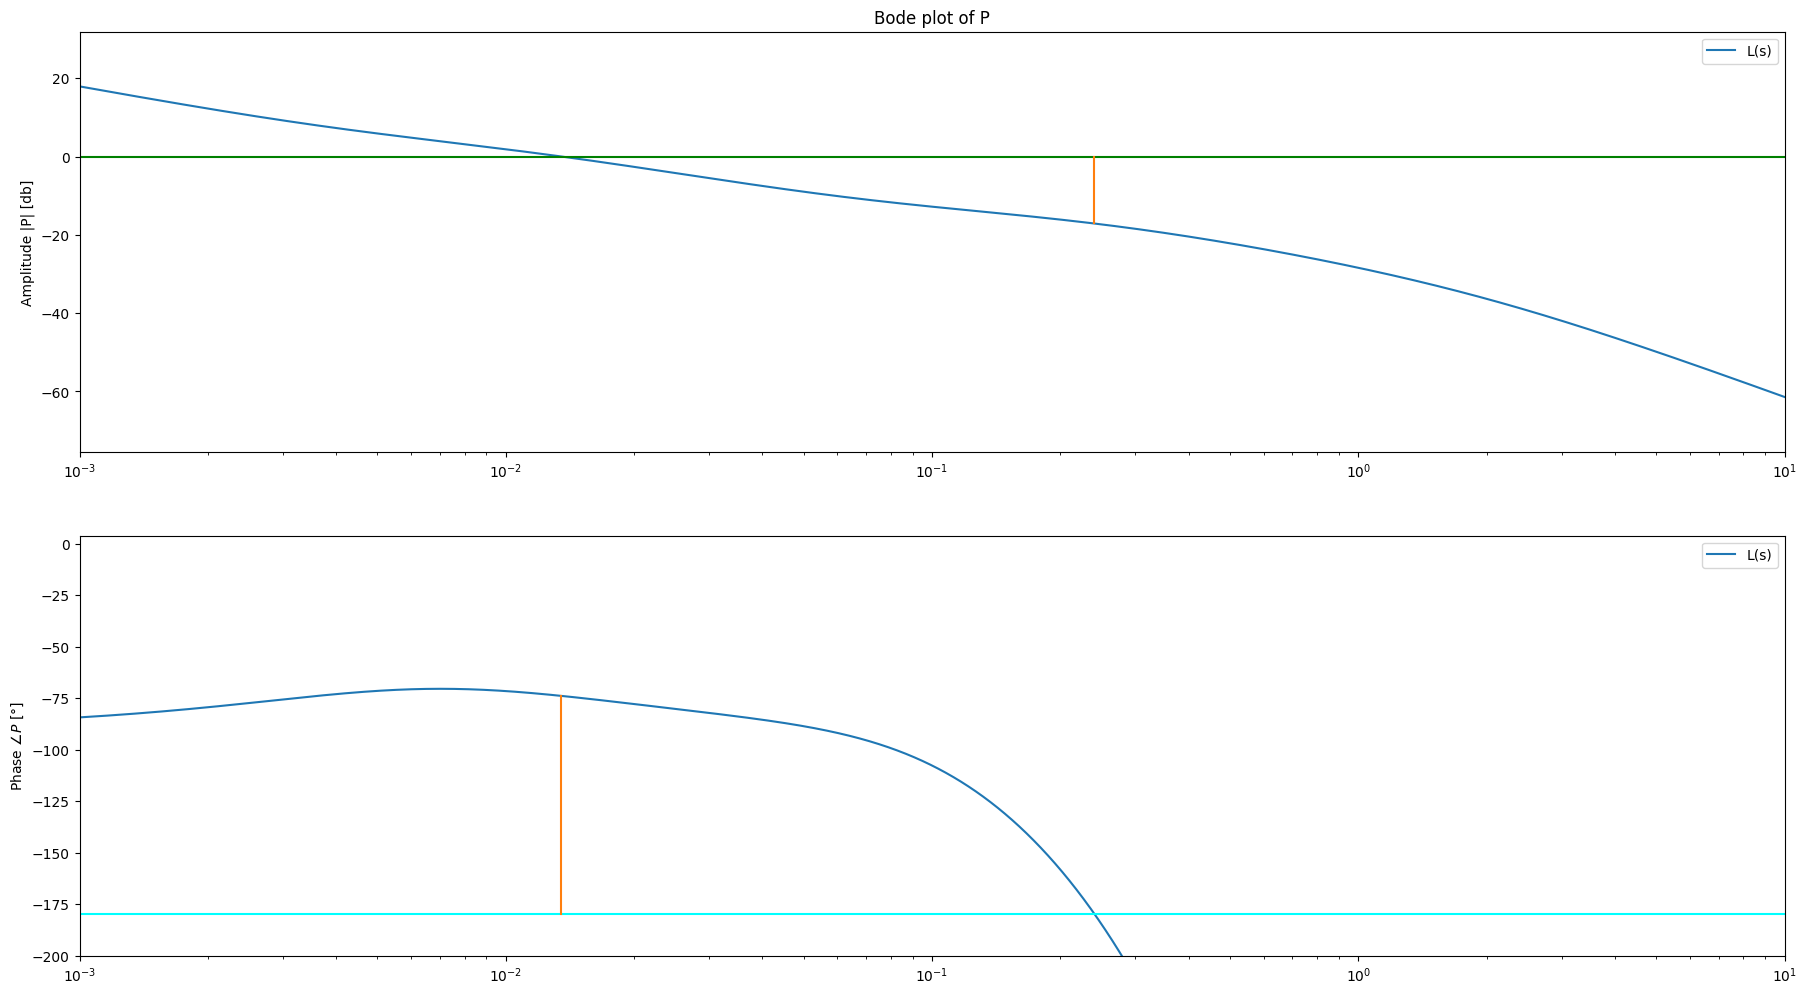

In [9]:
P = Process({})

Kp = 0.36
Tlag1 = 0.5
Tlag2 = 100
theta = 7.85
T1p = 201 
T2p = 8 

P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = Tlag1
P.parameters['Tlag2'] = Tlag2
P.parameters['theta'] = theta

Kc, Ti, Td = IMCTuning(Kp,T1p,T2p,thetap,gamma, 'SOPDT')

C = PID({})
C.parameters['Kc'] = Kc
C.parameters['Ti'] = Ti
C.parameters['Td']= Td
C.parameters['Tfd'] = alpha *Td


omega = np.logspace(-3,1,10000)

Ps = Bode(P,omega,Show=False)

Margin(Ps,C,omega) 
